In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_squared_error


In [32]:
st_data = pd.read_csv("D:/R PROGRAMMIMGS/jupyter/student.csv")

In [33]:
st_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [34]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [35]:
st_data.describe(include ='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [36]:
# therefore the data has no null values as we can see using describe and info method

In [37]:
# declaring the variables
x = st_data['Hours']
y = st_data['Scores']

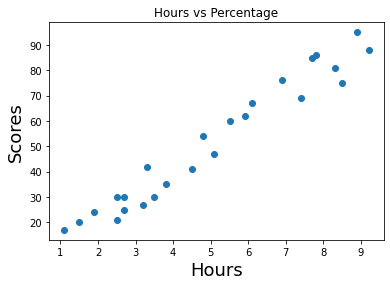

In [38]:
# Scatter plot between Hours and Scores

plt.scatter(x,y)
plt.title('Hours vs Percentage')
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Scores', fontsize=18)
plt.show()

In [39]:
# we can see from the graph that there is a linear relationship between study hours and scores
#which means that there is a linearity in data and there is no other feature, so we can perform linear regression.

In [40]:
# Reshape x and y with RESHAPE METHOD
X = x.values.reshape(-1,1)
Y = y.values.reshape(-1,1)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)

In [42]:
#performing the regression

st_reg = LinearRegression()
st_reg.fit(x_train, y_train)
print('Model Training Completed')

Model Training Completed


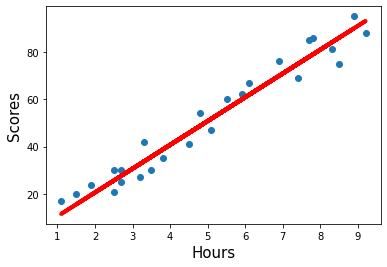

In [56]:
y_hat = st_reg.coef_*X + st_reg.intercept_

plt.scatter(X,Y)
plt.plot(X, y_hat, c='red',lw=4)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.show()

In [44]:
##Visually we can see tat the regression line is fitting the data quite well.

In [45]:
#Predicting values with the model and comparing it with the actual values

In [46]:
y_predict = st_reg.predict(x_test)

In [47]:
df = pd.DataFrame(y_test, columns = ['Actual Score'])
df

,Actual Score
0,69
1,67
2,30
3,54
4,17


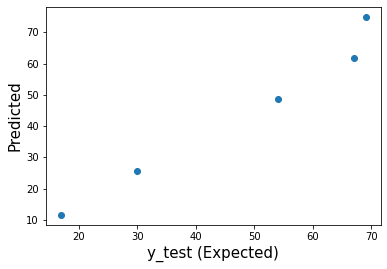

In [48]:
# Ploting test scores against predicted score
plt.scatter(y_test,y_predict)
plt.xlabel('y_test (Expected)', size=15)
plt.ylabel('Predicted', size=15)
plt.show()

In [64]:
#Predicting value of given 9.25 hours study time
hours = [[9.25,]]
own_pred = st_reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.49349906]


In [50]:
#Evaluating Model by root mean square error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print('Mean square error: ', mse)
print('Root mean square error: ', rmse)


Mean square error:  27.29769538229271
Root mean square error:  5.224719646286555


In [53]:
#calculating R-Squares
r2 = st_reg.score(x_train, y_train)
print('R-squares:', r2,'\n Thus 95% of the data fits the model')

R-squares: 0.953896720241372 
 Thus 95% of the data fits the model
